In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-data/diff.csv
/kaggle/input/new-data/data.csv


# Scaling vs. Normalization: What’s the difference?
One of the reasons that it’s easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably. 
* **Scaling**, you’re changing the range of your data. 
* **Normalization** you’re changing the shape of the distribution of your data. each of these options.

Below we are going to show how to scale a data-->

## Scaling:
This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1. We want to scale data when using methods based on measures of the spread of data, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of “1” in any numeric feature is given the same importance.
what about if we’re looking at something like height and weight???

So, by scaling your variables, we can help compare different variables on equal footing.

Text(0.5, 1.0, 'Scaled data')

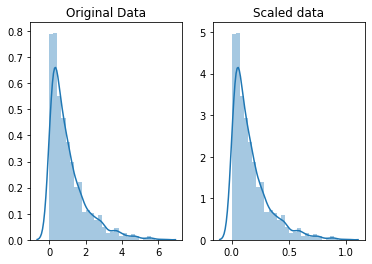

In [2]:
scaler=MinMaxScaler()
# Let's create a data for purpose of explaining.
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = scaler.fit_transform(original_data.reshape(-1,1))

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## Normalization
Normalization is a more radical transformation than Scaling. The point of normalization is to change your observations so that they can be described as a normal distribution.
Normal distribution, also known as the “bell curve”,is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.
In general, we want to normalize the data if using a machine learning or statistics technique that assumes the data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.)

Text(0.5, 1.0, 'Normalized data')

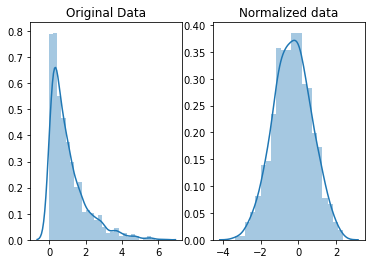

In [3]:
# for Box-Cox Transformation
from scipy import stats
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

## **Time to apply what we learned on the a real data: -->**

In [4]:
data = pd.read_csv("../input/new-data/data.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Scaling 

Text(0.5, 1.0, 'Scaled data')

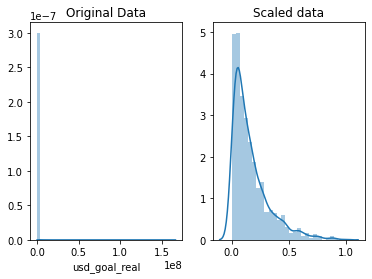

In [5]:
# select the usd_goal_real column
usd_goal = data.usd_goal_real
# scale the goals from 0 to 1
scaled_data_2 = scaler.fit_transform(original_data.reshape(-1,1))

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(usd_goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data_2, ax=ax[1])
ax[1].set_title("Scaled data")


### Normalization

Text(0.5, 1.0, 'Normalized data')

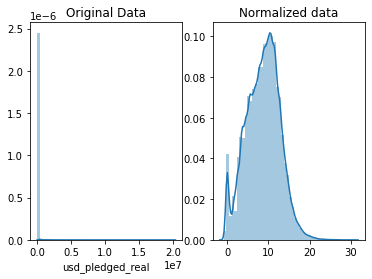

In [6]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = data.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = data.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")